## Introduction to Data Science

## Oral Assignment

## Student: Alex Arnold de Almeida Mendes 


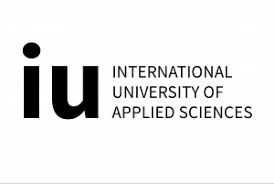

## Exploratory Data Analysis (EDA) and Linear Regression to Predict Insurance Charges
This project aims to perform a comprehensive exploratory data analysis (EDA) on an insurance dataset, followed by the development of a linear regression model to predict insurance charges. We will investigate the dataset's characteristics, identify patterns and relationships between variables, and evaluate the performance of the linear regression model.

 # Importing Libraries and Loading the Dataset

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
df = pd.read_csv('insurance (1).csv')

## Initial Analysis of the Dataset

In [30]:
# Viewing the first few rows of the dataset
df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
# Checking for missing values
df.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Data Analysis (EDA)

Analyzing Numerical Variables
Age:
Histogram: We will visualize the age distribution of the insured individuals using a histogram.



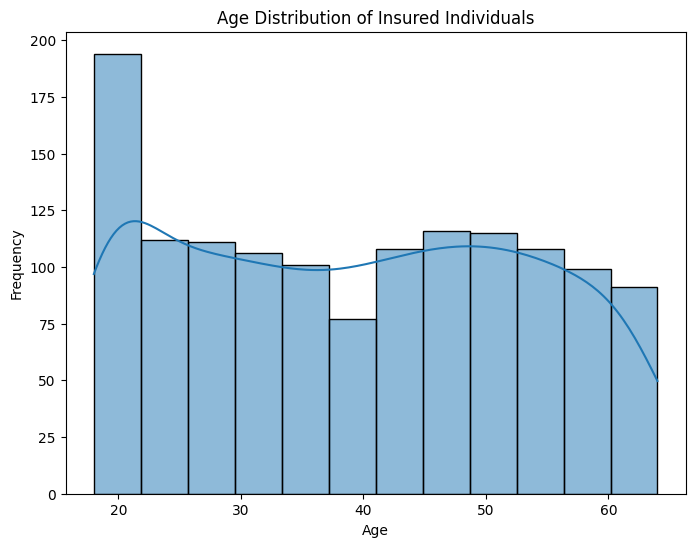

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution of Insured Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Observation: The age distribution appears to be slightly right-skewed, with a higher concentration of individuals between 20 and 40 years old.

Boxplot: We will use a boxplot to analyze age in relation to sex.

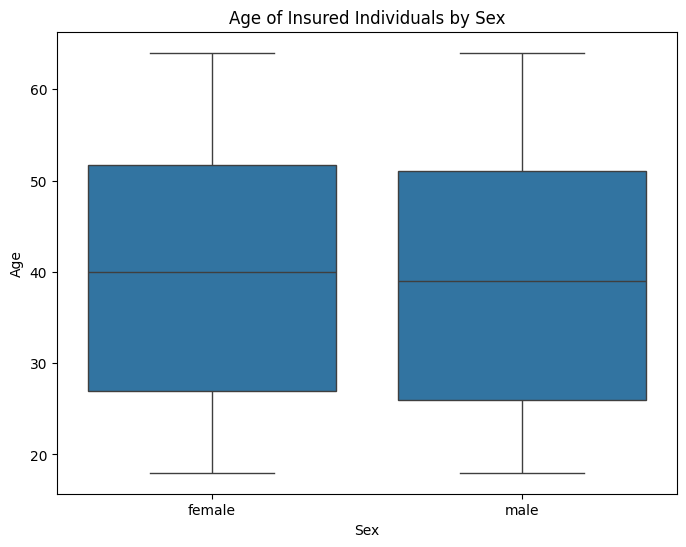

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=df)
plt.title('Age of Insured Individuals by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

## Observation: The average ages of males and females appear to be similar, with a slight difference in the upper quartile.

BMI (Body Mass Index):
Histogram: We will visualize the BMI distribution of the insured individuals using a histogram.

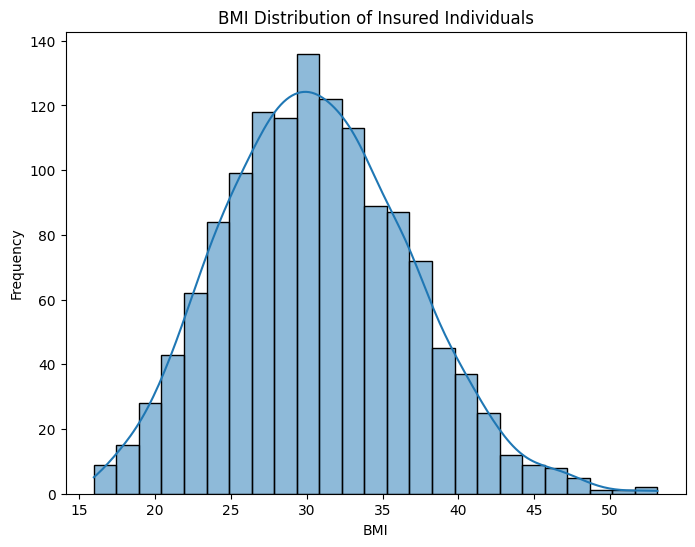

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution of Insured Individuals')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

## Observation: The BMI distribution appears to be slightly right-skewed, with a higher concentration of individuals between 25 and 35 BMI.

Boxplot: We will use a boxplot to analyze BMI in relation to sex.

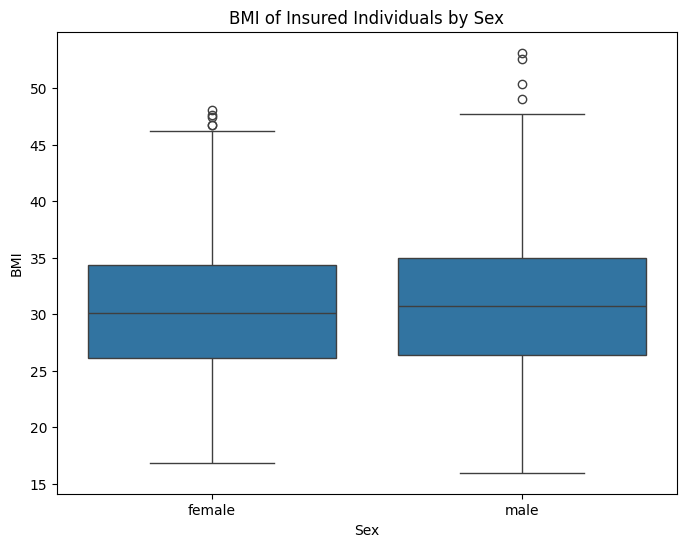

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('BMI of Insured Individuals by Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

## Observation: Males tend to have a slightly higher BMI than females.

Scatter Plot: We will plot BMI against insurance charges to visualize the potential relationship between these variables.

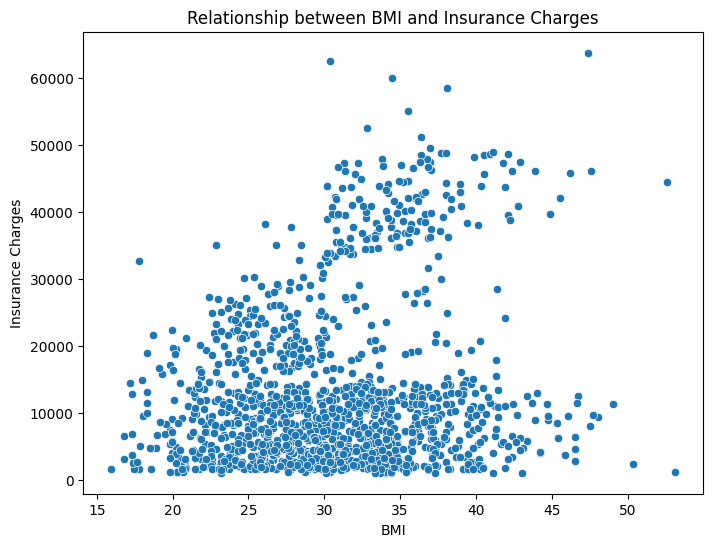

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Relationship between BMI and Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

## Observation: There is an upward trend in insurance charges as BMI increases.

Number of Children:
Histogram: We will visualize the distribution of the number of children of the insured individuals using a histogram.

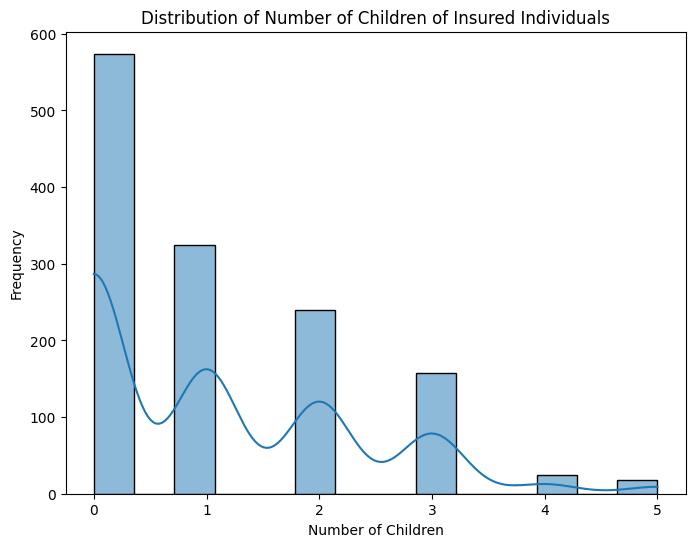

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df['children'], kde=True)
plt.title('Distribution of Number of Children of Insured Individuals')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

## Observation: Most insured individuals have no children or only one child, with a gradual decrease in frequency as the number of children increases.

Boxplot: We will use a boxplot to analyze the number of children in relation to sex.

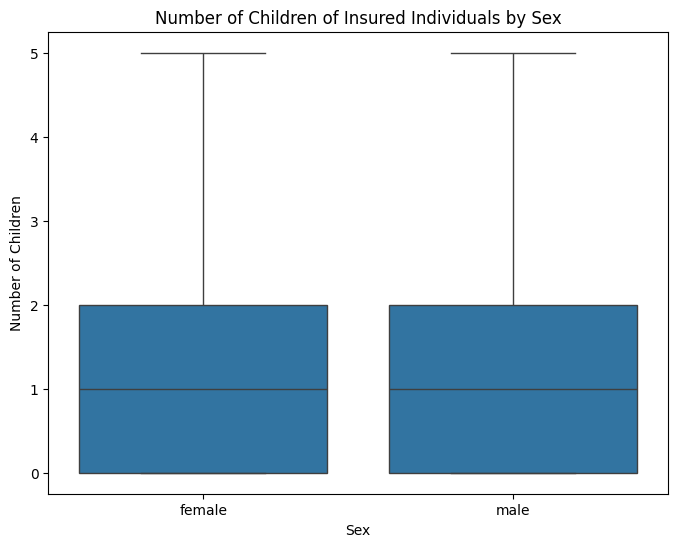

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='children', data=df)
plt.title('Number of Children of Insured Individuals by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Children')
plt.show()

## Observation: The median number of children is similar for both males and females.

Insurance Charges:
Histogram: We will visualize the distribution of insurance charges using a histogram.

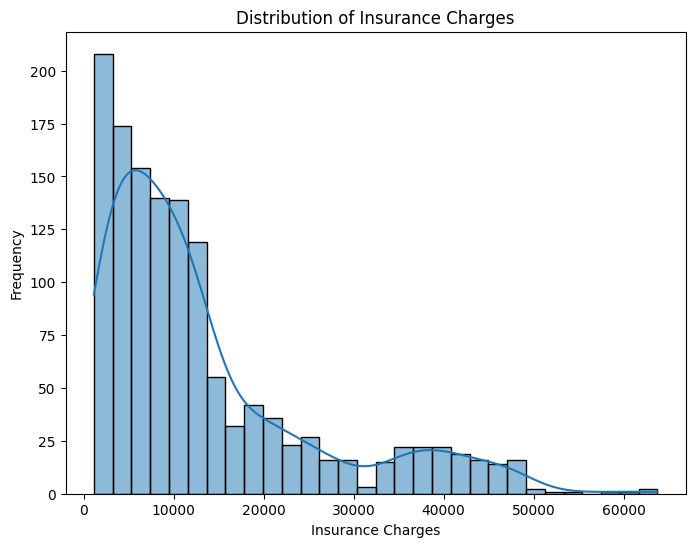

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.show()

## Observation: The distribution of insurance charges is heavily right-skewed, indicating that a large proportion of individuals have relatively low charges, while a small percentage have very high charges.

## Analyzing Categorical Variables


Sex:
Bar Chart: We will use a bar chart to visualize the proportion of males and females in the dataset.

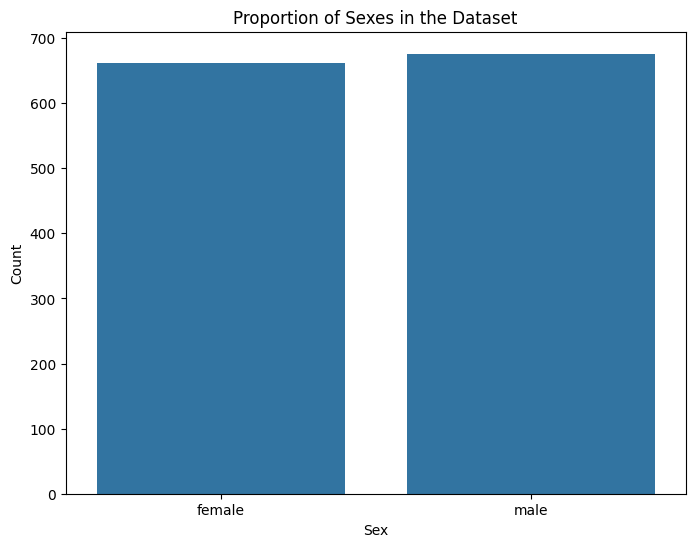

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title('Proportion of Sexes in the Dataset')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

## Observation: The proportion of males and females appears to be relatively balanced.

Boxplot: We will use a boxplot to analyze insurance charges in relation to sex.

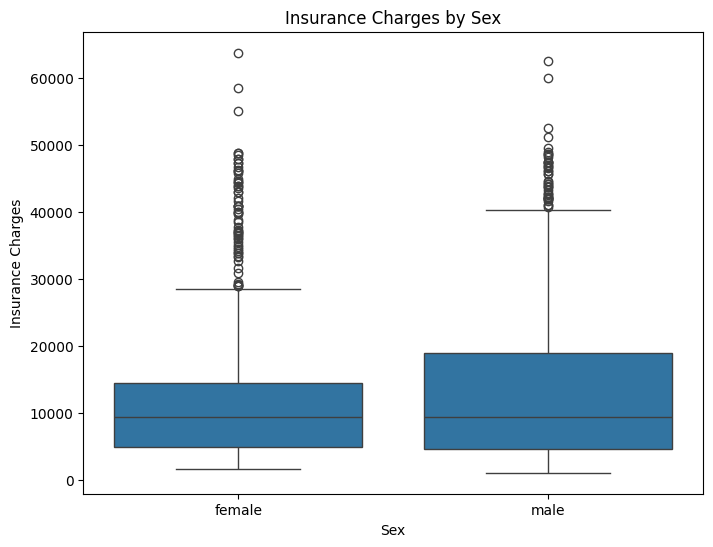

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Insurance Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Insurance Charges')
plt.show()

## Observation: Males tend to have slightly higher insurance charges than females.

Smoker:
Bar Chart: We will use a bar chart to visualize the proportion of smokers and non-smokers in the dataset.

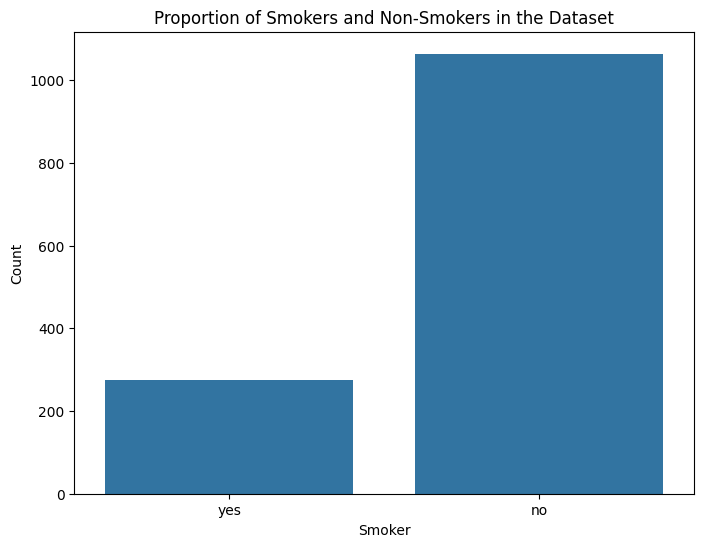

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=df)
plt.title('Proportion of Smokers and Non-Smokers in the Dataset')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

## Observation: The number of non-smokers is significantly greater than the number of smokers.
Boxplot: We will use a boxplot to analyze insurance charges in relation to smoking habits.

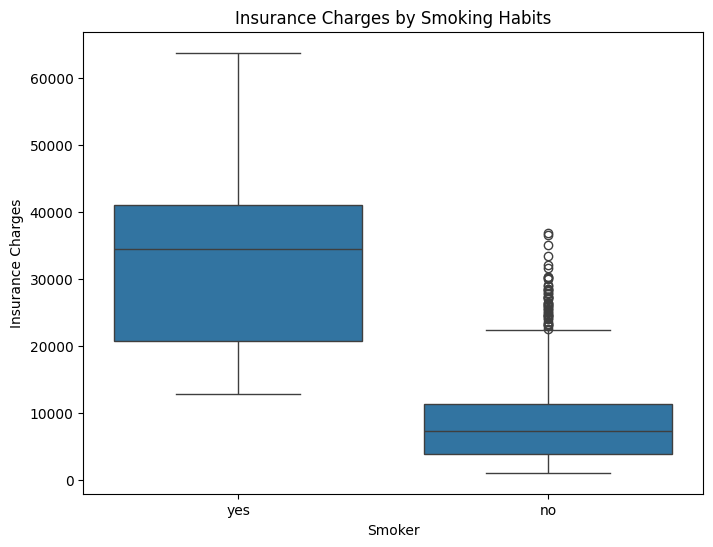

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges by Smoking Habits')
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.show()

## Observation: Insurance charges for smokers are significantly higher than for non-smokers, highlighting the influence of smoking habits on insurance costs.

Region:
Bar Chart: We will use a bar chart to visualize the distribution of insured individuals by region.

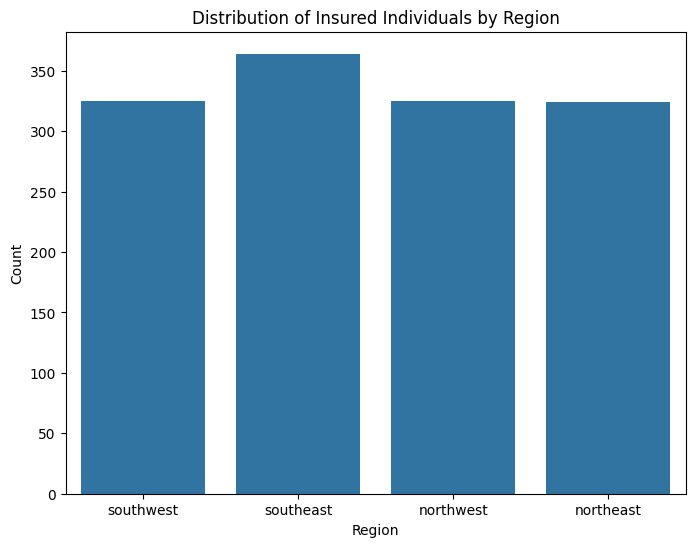

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=df)
plt.title('Distribution of Insured Individuals by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

## Observation: The distribution of insured individuals by region appears to be relatively balanced.
Boxplot: We will use a boxplot to analyze insurance charges in relation to region.

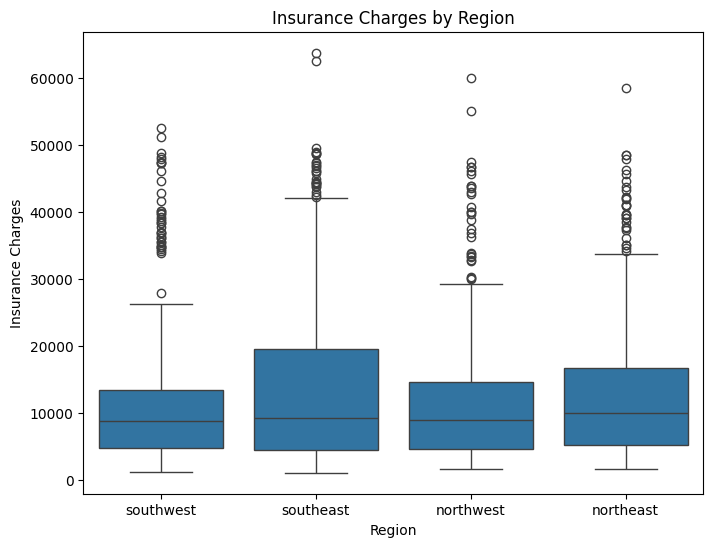

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.show()

## Preparing the Data for Linear Regression
## Encoding Categorical Variables

We will use the One-Hot Encoding technique to transform categorical variables (sex, smoker, and region) into numerical binary variables.

## Observation: Regions seem to have a moderate impact on insurance charges, with the Southeast region showing slightly higher charges.

## Correlations and Correlation Matrix

Correlation Heatmap: We will generate a heatmap to visualize the correlation between the numerical variables in the dataset.

However, it seems this line is not being executed before you calculate the correlation matrix.
Here's how to fix it:
Make sure you execute the one-hot encoding line before calculating the correlation matrix:

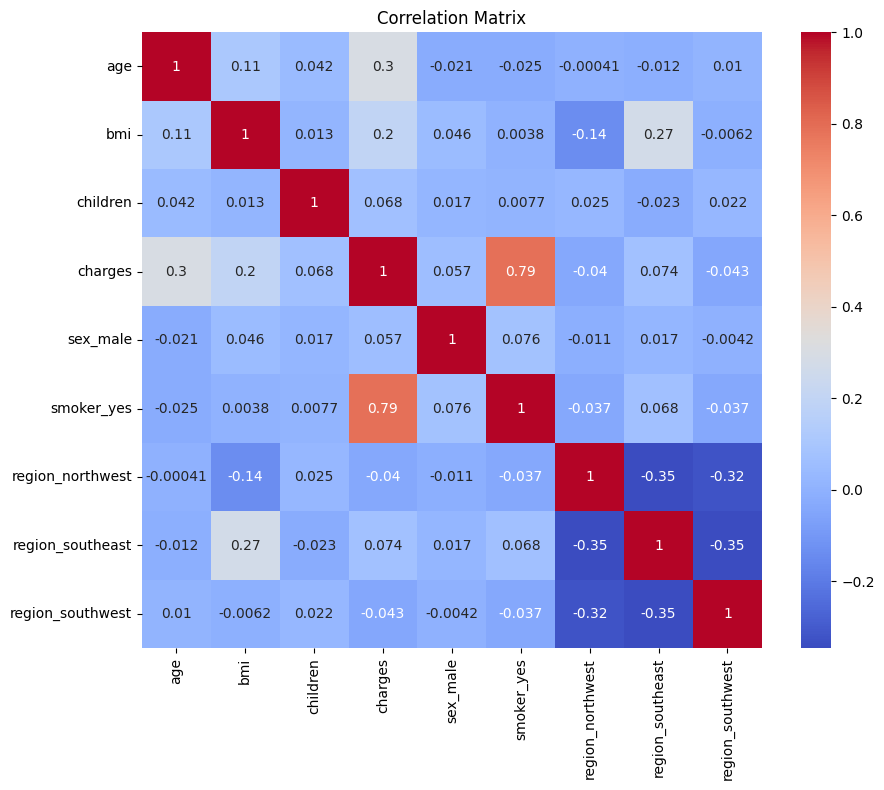

In [47]:
# One-hot encode categorical variables (do this *before* calculating the correlation)
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Now calculate the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows the linear relationship between each pair of variables in your dataset. Here's what we can conclude from this matrix:
Strongest Correlations:
'charges' and 'smoker_yes': The highest correlation (0.79) indicates a strong positive linear relationship. This means that smokers tend to have significantly higher insurance charges than non-smokers.
'charges' and 'bmi': This has a moderate positive correlation (0.2). It suggests that higher BMI is associated with higher insurance charges, but the relationship is not as strong as with smoking.
Other Notable Correlations:
'charges' and 'age': A weak positive correlation (0.3) suggests that older individuals tend to have slightly higher insurance charges, but this is not a dominant factor.
'charges' and 'sex_male': This shows a very weak positive correlation (0.057), indicating a very slight tendency for males to have higher charges compared to females.
'bmi' and 'region_southeast': The positive correlation (0.27) suggests that individuals from the Southeast region may have higher BMI on average.
Weak or No Correlations:
'charges' and 'children': A very weak positive correlation (0.068) implies that the number of children has a minimal impact on insurance charges.
'charges' and 'region_northwest', 'region_southeast', 'region_southwest': These correlations are close to zero, suggesting that the region itself has very little influence on insurance charges.
Key Takeaways:
Smoking is the strongest factor influencing insurance charges. This is likely due to higher health risks associated with smoking, leading to increased medical costs.
BMI plays a role, but less significantly than smoking. This is consistent with the understanding that health conditions linked to BMI can impact insurance costs.
Age, sex, and the number of children seem to have limited influence on insurance charges. This suggests that these factors might be less relevant for insurers compared to smoking and BMI.
Important Note:
Correlation does not imply causation. While this analysis shows relationships between variables, it does not prove that these variables directly cause the increase in insurance charges. There could be other underlying factors at play.

## Splitting the Data into Training and Testing Sets

We will split the dataset into training and testing sets to evaluate the performance of the linear regression model.

In [48]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Linear Regression Model

We will create a linear regression model and train it with the training data.

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluating Model Performance

We will evaluate the performance of the linear regression model using the testing data.

In [50]:
# Making predictions with the trained model
y_pred = model.predict(X_test)

# Calculating the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculating the coefficient of determination (R²)
r2 = r2_score(y_test, y_pred)

# Printing the results
print('RMSE: {:.2f}'.format(rmse))
print('R²: {:.2f}'.format(r2))


RMSE: 5796.28
R²: 0.78


/home/alexmendes/insurance_price_predict/myenv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Alright, let's implement a Random Forest Regression model to see if we can improve upon the linear regression results.

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_r2 = r2_score(y_test, rf_y_pred)

print('Random Forest - RMSE: {:.2f}'.format(rf_rmse))
print('Random Forest - R²: {:.2f}'.format(rf_r2))


Random Forest - RMSE: 4576.30
Random Forest - R²: 0.87


/home/alexmendes/insurance_price_predict/myenv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Conclusion

Random Forest Regression model has significantly improved the performance compared to the linear regression model. Here's a detailed analysis and comparison:

## Model Comparison:
Model	RMSE	R²
Linear Regression	5796.28	0.78

Random Forest Regression	4576.30	0.87

## Analysis:

Lower RMSE: The Random Forest model's RMSE of 4576.30 is significantly lower than the linear regression model's RMSE of 5796.28. This indicates that the Random Forest model is making predictions that are closer, on average, to the actual insurance charges.

Higher R²: The Random Forest model's R² of 0.87 is considerably higher than the linear regression model's R² of 0.78. This implies that the Random Forest model explains a greater proportion of the variability in insurance charges, meaning it captures more of the underlying relationships in the data.

## Why Random Forest Outperforms Linear Regression:

Non-linearity: Insurance charges likely involve complex, non-linear relationships between factors like smoking, BMI, age, and number of children. Random Forest, with its decision tree structure, is adept at capturing these non-linear patterns, while linear regression struggles.
Feature Interactions: Random Forests implicitly account for interactions between features. For example, the effect of smoking on charges might be different for younger vs. older individuals, or for those with high vs. low BMI. Random Forest can learn these complex interactions, while linear regression assumes additive effects of features.

# Choosing the Best Model:

Based on the results, the Random Forest Regression model is clearly the better choice for predicting insurance charges in this dataset. It provides:

## Higher accuracy: The lower RMSE indicates a more precise model.

Better explanatory power: The higher R² shows that the model captures more of the underlying relationships in the data, leading to a more robust understanding of the factors influencing charges.

## Caveats:

## Overfitting: 

Random Forest models can overfit to the training data, particularly if the number of trees or maximum depth is not adequately tuned. Be sure to perform hyperparameter optimization to avoid this.


## Interpretability:

 While Random Forests are powerful, they can be less interpretable than linear regression models. Understanding the exact relationships learned by the trees can be challenging.

## Next Steps:

## Hyperparameter Tuning: 

Experiment with different hyperparameters for the Random Forest model to further optimize its performance.

## Feature Importance: 

Examine the feature importance scores from the Random Forest model to gain insight into which factors contribute the most to the prediction of insurance charges.

## Model Evaluation:

 Use other evaluation metrics (like MAE, MAPE) to gain a more complete understanding of the model's performance.



## Model Evaluation Metrics:

## Root Mean Squared Error (RMSE):

 Measures the average difference between predicted and actual values. A lower RMSE is better.
Formula: RMSE = √(∑(y_actual - y_predicted)² / n)
Explanation: It's the square root of the mean of the squared errors. It penalizes larger errors more heavily.

R² (Coefficient of Determination): Indicates how well the model explains the variance in the target variable (insurance charges). A higher R² is better.

## Formula:
 R² = 1 - (SS_res / SS_tot)

Explanation: Where SS_res is the sum of squared residuals (errors) and SS_tot is the total sum of squares (variance of the target variable). It tells you the percentage of variance in the target that is explained by the model.

## Key Differences in Calculation:

## Linear Regression: 

RMSE and R² are directly calculated using the formula above.
Random Forest Regression: While the formulas are the same, the calculations are performed on the average of predictions from multiple trees in the forest.


## RMSE:

 Both models use the same RMSE formula, but the Random Forest model's RMSE was lower, indicating more accurate predictions.

## R²: 

Both models use the same R² formula, but the Random Forest model's R² was higher, meaning it explained a larger portion of the variability in insurance charges.

## Features Importances

In [52]:
# Assuming you have already trained your Random Forest model:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)


            Feature  Importance
4        smoker_yes    0.608618
1               bmi    0.216506
0               age    0.134232
2          children    0.019413
3          sex_male    0.006379
5  region_northwest    0.005587
6  region_southeast    0.005314
7  region_southwest    0.003950
